In [121]:
import pandas as pd
import numpy as np

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [123]:
data_root = "./datasets/iris/"

In [124]:
data = pd.read_csv(data_root+"iris.data",header=None)
data.columns = ["sepal_len","sepal_width","petal_len","petal_width","class"]

### normalization

In [125]:
def normalization(data):
    minVals = data.min(0)
    maxVals = data.max(0)
    ranges = maxVals - minVals
    normDataSet = (data - np.tile(minVals,(data.shape[0],1)))/np.tile(ranges,(data.shape[0],1))
    return normDataSet, ranges, minVals
    
    

### logisticRegression

#### features, label, train set and test set.
*T: setosa  F: not setosa*

In [126]:
X = data[["sepal_len","sepal_width","petal_len","petal_width"]]
y = data[["class"]]
y.loc[y["class"] == "Iris-setosa"] = "T"
y.loc[y["class"] != "T"] = "F"

/Users/zhangxiaoyao/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/zhangxiaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhangxiaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [127]:
[X_train,X_test,y_train,y_test] = train_test_split(X,y,train_size=100,random_state=31390)

In [128]:
X_train,ranges,minVals = normalization(X_train)
X_test = (X_test - np.tile(minVals,(X_test.shape[0],1)))/np.tile(ranges,(X_test.shape[0],1))

#### classifer, training and predict

In [129]:
clf = LogisticRegression(max_iter=100,random_state=31390,verbose=True).fit(X_train,y_train)

/Users/zhangxiaoyao/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [130]:
clf.score(X_train,y_train)

1.0

In [131]:
clf.score(X_test,y_test)

1.0

### K-Nearest Neighbor

In [132]:
import heapq

def kNNpredict(K ,x, X, y):
    result = [None]*x.shape[0]
    for t,x_row in enumerate(x) :
        distance = [0]*X.shape[0]
        for i, row in enumerate(X):
            for j, v in enumerate(row):##v: the value of the features of every item in training set  
                distance[i] += (v - x_row[j])**2  ##using l2 distance
        ##print(distance)
        #nearest_neighbor = map(distance.index, heapq.nsmallest(K, distance))
        sortedDistance = np.asarray(distance).argsort()
        nearest_neighbor = sortedDistance[:K]
        r={}
        for i in nearest_neighbor:
            key = str(y[i])
            if key in r.keys():
                r[key] += 1
            else:
                r[key] = 1
        result[t] = max(r, key=r.get)
    return result
        
        
        

In [133]:
def kNNpredict_matrix(K ,x, X, y):
    result = [None]*x.shape[0]
    for t,x_row in enumerate(x) :
        distance = [0]*X.shape[0]
        distance = ((X - x_row)**2).sum(axis = 1) 
        sortedDistance = distance.argsort() ##升序排列，return index
        ##print(distance)
        #print(sortedDistance.shape)
        nearest_neighbor = sortedDistance[:K]
        #print(nearest_neighbor)
        r={}
        for i in nearest_neighbor:
            key = str(y[i])
            r[key] = r.get(key,0) + 1
        result[t] = max(r, key=r.get)
    return result

In [136]:
def kNNscore(K, X_train, X_test, y_train, y_test):
    result = kNNpredict(K, X_test, X_train, y_train)
    true = 0
    for i, v in enumerate(result):
        if v == str(y_test[i]):
            true += 1
            
    score = (true/float(len(result)))*100
    print(true)
    return score

In [137]:
def kNNscore_matrix(K, X_train, X_test, y_train, y_test):
    result = kNNpredict(K, X_test, X_train, y_train)
    true = 0
    for i, v in enumerate(result):
        if v == str(y_test[i]):
            true += 1
            
    score = (true/float(len(result)))*100
    print(true)
    return score

In [138]:
kNNscore(1, X_train.values, X_test.values, y_train.values, y_test.values)

50


100.0

In [139]:
kNNscore(3, X_train.values, X_test.values, y_train.values, y_test.values)

50


100.0

In [140]:
kNNscore(5, X_train.values, X_test.values, y_train.values, y_test.values)

50


100.0

In [141]:
kNNscore_matrix(1, X_train.values, X_test.values, y_train.values, y_test.values)

50


100.0

In [142]:
kNNscore_matrix(3, X_train.values, X_test.values, y_train.values, y_test.values)

50


100.0

In [143]:
kNNscore_matrix(5, X_train.values, X_test.values, y_train.values, y_test.values)

50


100.0

### using three different class

In [144]:
X_3 = data[["sepal_len","sepal_width","petal_len","petal_width"]]
y_3 = data[["class"]]
[X_train_3,X_test_3,y_train_3,y_test_3] = train_test_split(X_3,y_3,train_size=100,random_state=31390)

In [145]:
kNNscore(1, X_train_3.values, X_test_3.values, y_train_3.values, y_test_3.values)

49


98.0

In [146]:
kNNscore(3, X_train_3.values, X_test_3.values, y_train_3.values, y_test_3.values)

49


98.0

In [147]:
kNNscore(5, X_train_3.values, X_test_3.values, y_train_3.values, y_test_3.values)

48


96.0

In [157]:
kNNscore(10, X_train_3.values, X_test_3.values, y_train_3.values, y_test_3.values)

47


94.0

In [148]:
kNNscore_matrix(1, X_train_3.values, X_test_3.values, y_train_3.values, y_test_3.values)

49


98.0

In [149]:
kNNscore_matrix(3, X_train_3.values, X_test_3.values, y_train_3.values, y_test_3.values)

49


98.0

In [150]:
kNNscore_matrix(5, X_train_3.values, X_test_3.values, y_train_3.values, y_test_3.values)

48


96.0

In [158]:
kNNscore_matrix(10, X_train_3.values, X_test_3.values, y_train_3.values, y_test_3.values)

47


94.0

In [151]:
clf_3 = LogisticRegression(max_iter=50,random_state=31390,verbose=10).fit(X_train_3,y_train_3)

/Users/zhangxiaoyao/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/zhangxiaoyao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_j

In [152]:
clf_3.score(X_train_3,y_train_3)

0.97

In [153]:
clf_3.score(X_test_3,y_test_3)

0.96

### play matplotlib

In [154]:
import matplotlib.pyplot as plt

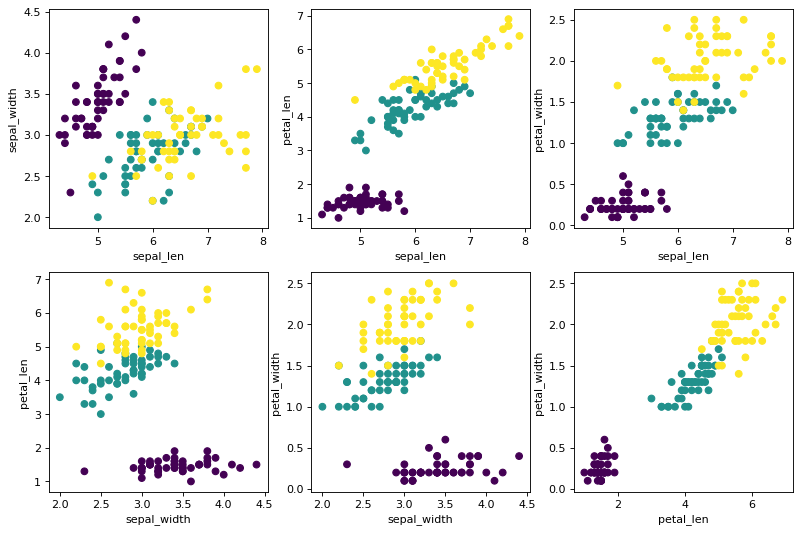

In [155]:
dataplt = data
dataplt = dataplt.replace("Iris-setosa", 1)
dataplt = dataplt.replace("Iris-versicolor", 2)
dataplt = dataplt.replace("Iris-virginica", 3)
#dataplt["class"].loc[dataplt["class"] == "Iris-setosa"] = 1
#dataplt["class"].loc[dataplt["class"] == "Iris-versicolor"] = 2
#dataplt["class"].loc[dataplt["class"] == "Iris-virginica"] = 3
Xplt = data[["sepal_len","sepal_width","petal_len","petal_width"]].values
#Xplt,_,_ = normalization(Xplt)
dataplt=dataplt.values
fig = plt.figure(figsize=(12,8), dpi=80)
pairs = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
label = ["sepal_len","sepal_width","petal_len","petal_width"]
for i,(x_index,y_index) in enumerate(pairs):
    plt.subplot(2,3,i+1)
    plt.scatter(Xplt[:,x_index],Xplt[:,y_index],c = dataplt[:,4])
    plt.xlabel(label[x_index])
    plt.ylabel(label[y_index])
plt.show()

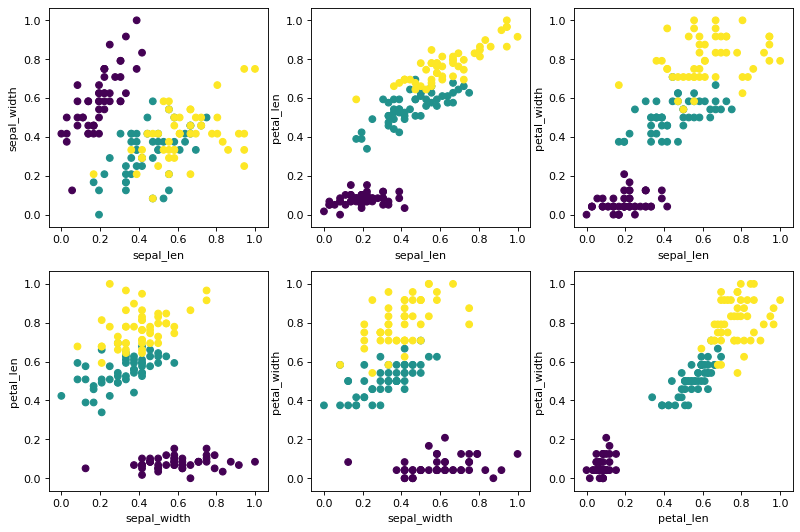

In [156]:
dataplt = data
dataplt = dataplt.replace("Iris-setosa", 1)
dataplt = dataplt.replace("Iris-versicolor", 2)
dataplt = dataplt.replace("Iris-virginica", 3)
#dataplt["class"].loc[dataplt["class"] == "Iris-setosa"] = 1
#dataplt["class"].loc[dataplt["class"] == "Iris-versicolor"] = 2
#dataplt["class"].loc[dataplt["class"] == "Iris-virginica"] = 3
Xplt = data[["sepal_len","sepal_width","petal_len","petal_width"]].values
Xplt,_,_ = normalization(Xplt)
dataplt=dataplt.values
fig = plt.figure(figsize=(12,8), dpi=80)
pairs = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
label = ["sepal_len","sepal_width","petal_len","petal_width"]
for i,(x_index,y_index) in enumerate(pairs):
    plt.subplot(2,3,i+1)
    plt.scatter(Xplt[:,x_index],Xplt[:,y_index],c = dataplt[:,4])
    plt.xlabel(label[x_index])
    plt.ylabel(label[y_index])
plt.show()